# MA 755 - Assignment 2

by Neha, Katrina, Chengdong

## **1. Get the data**
    1. Set up the working directory
    2. Download and unzip the data file
    3. Create a train set and a test set
  
## **2. Data discovery and visualisation**
    1. Box plot and histogram
    2. Examine the correlation

## **3. Prepare the data for Machine Learning algorithms**
    1. Data cleaning - imputing missing values
  
## **4. Select and train different classification models**
    1. Logistic regression model 
    2. Random Forest model 
    3. SGD model 
    
## **5. Comparing the performance of the models**
    1. Measuring accuracy using cross-validation
    2. Confusion matrix
    3. Precision and recall
    4. Precision/Recall tradeoff
    5. ROC curve

## **6. Conclusion**
   

## 1. Get the data

### *1.1. Set up the working directory *

The first step is to create a workspace. We import the `os` module. Next we us the `getcwd` method to return a string representing the current working directory. Then we use the `chdir` method to change the current working directory to path mentioned. Finally we confirm if our working directory is set to the one specified by calling `getcwd` metod again.

In [1]:
import os
os.getcwd() 

'C:\\Users\\katri\\Desktop\\MA755\\Jupyter Notebook\\MA-755-Assignment-2-master'

The above output tell us that our current working directory is '/Users/akhoury/Desktop/MA 755'

###  *1.2. Download and unzip the data file*

We import the `os` and `zipfile` modules to fetch our data which is in the form of a zipped file. Next we import the `urllib` module that is used to fetch URLs. `COLLEGE_URL` represents the URL for our data. `COLLEGE_PATH` is the directory created in our working space to downlaod and save the dataset.

`fetch_college_data` function has two paramaeters : `college_url` for the url of our dataset and `college_path` for the path in our working space where the data should be downloaded and saved.`makedirs` method is used to create the `datatsets/college` directory and setting `exist_ok` to True tells Python to not raise an error if the directory already exists.`os.path.join` method combines the name of the directory where the data is stored and the name of the data file to create an abosulte path to the datafile.

In [8]:
import os
import zipfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://ed-public-download.apps.cloud.gov/downloads/"
COLLEGE_PATH = "datasets/college"
COLLEGE_URL = DOWNLOAD_ROOT + "CollegeScorecard_Raw_Data.zip"

def fetch_college_data(college_url=COLLEGE_URL, college_path=COLLEGE_PATH):
    os.makedirs(college_path, exist_ok=True)
    zip_path = os.path.join(college_path, "Raw_Data.zip")
    urllib.request.urlretrieve(college_url, zip_path)
    college_zip = zipfile.ZipFile(zip_path)
    college_zip.extractall(path=college_path)
    college_zip.close()

Now we call the function `fetch_college_data`.

In [9]:
fetch_college_data()

It creates a `datasets/college` directory in the workspace, downloads the `CollegeScorecard_Raw_Data.zip` file and extracts all files from it in this directory.

The code below is the function to read in the csv file `MERGED2014_15_PP.csv` to a Pandas DataFrame.

In [10]:
import pandas as pd

DATA_PATH= "datasets/college/CollegeScorecard_Raw_Data"

def load_college_data(data_path=DATA_PATH):
    # `data_path` is relative to the directory containing this script
    csv_path = os.path.join(data_path, "MERGED2014_15_PP.csv")
    return pd.read_csv(csv_path, low_memory=False)

### *1.3 Take a quick look at the data structure*

Next we call the function `load_college_data` which returns a Pandas DataFrame and assign it to `college_original`. We also confirm its type and then look at the first five rows of the DataFrame `college_original` using the `head()` method

In [11]:
college_original = load_college_data()
print(type(college_original))
college_original.head()

<class 'pandas.core.frame.DataFrame'>


,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,NaN


The output tells us that `college_original` is a pandas Dataframe. Each row represents one college. There are 1743 attributes (columns). 

For further analysis, we need to subset this data set to include only our variables of interest.

### Subsetting the data

Based on the original dataset, a new dataframe is created, which includes the variables we mainly focus on:
* Dependent variable - 1
* Independent variables - 10

| **Variables** | **Description**      | **Type** | **Note**  |
| ------------- |:-------------:| -----------:|-----------:|
|CONTROL| Public or private institution |Categorical| Dependent|
|ICLEVEL| Level of institution |Categorical| Dependent|
|PCTFLOAN      | Rate of receiving federal loans | Numeric|Independent |
|PCTPELL      | Rate of receiving pell grant | Numeric|Independent |
| FEMALE      | Percentage of female students      | Numeric|  Independent |
| MARRIED | Percentage of married students|Numeric|   Independent |
| DEPENDENT |Percentage of married students     |Numeric|    Independent |
| VETERAN | Percentage of veteran students     |Numeric|   Independent |
|TUITFTE| Net tuition revenue per full-time student |Numeric| Independent|
|INEXPFTE|Instructional expenditures per full-time student |Numeric| Independent|
|DEP_INC_AVG|Average family income of dependent students |Numeric| Independent|
|IND_INC_AVG|Average family income of independent students |Numeric| Independent|

The subsetting of the DataFrame is done using square brackets and the names of the columns to be selected are placed inside the brackets. The selected columns are put in a new DataFrame called `college`.

Let's have a quick look at the first 5 rows of the DataFrame `college` by using the `head()` method.

In [12]:
college=college_original[['CONTROL','ICLEVEL','PCTFLOAN','PCTPELL','FEMALE','MARRIED', 'DEPENDENT', 'VETERAN',
                          'TUITFTE', 'INEXPFTE', 'DEP_INC_AVG', 'IND_INC_AVG' ]]
college.head()

,CONTROL,ICLEVEL,PCTFLOAN,PCTPELL,FEMALE,MARRIED,DEPENDENT,VETERAN,TUITFTE,INEXPFTE,DEP_INC_AVG,IND_INC_AVG
0,1,1,0.8284,0.7356,0.5262741999,0.0165942315,0.8704069538,PrivacySuppressed,9427.0,7437.0,33370.062501,9184.1313978
1,1,1,0.5214,0.3460,0.6323896753,0.1034554538,0.6883846794,0.0033305579,9899.0,17920.0,59212.341812,28786.1557
2,2,1,0.7795,0.6801,0.6465256798,0.2386706949,0.1057401813,PrivacySuppressed,12459.0,5532.0,30720.839981,18578.064211
3,1,1,0.4596,0.3072,0.4766449021,0.1320944249,0.6514314415,0.0090406831,8956.0,10211.0,67430.323934,25117.976718
4,1,1,0.7554,0.7347,0.6152291105,0.0097708895,0.8564690027,PrivacySuppressed,7733.0,7618.0,33576.943026,6974.2969861


From the first 5 rows of the data, we can observe that there are two variables (`CONTROL` and `ICLEVEL`) that have repetitive values, which indicates that these two variables might be categorical variables. 

Use the `value_counts()` method to have a closer look at these variables. This method gives us the frequency count for each of the unique values of the variable, arranged from highest to lowest.

In [13]:
college.iloc[:,0:2].apply(pd.Series.value_counts)

,CONTROL,ICLEVEL
1,2044,3281
2,1956,2249
3,3703,2173


The types and levels of the institutions represented by these values are listed below

|| **CONTROL** | **ICLEVEL**      
| ------------- |:-------------:| -----------:|-----------:|
|*1*| Public institutions |4-year institutions |
|*2*| Private nonprofit institutions |2-year institutions|
|*3*| Private for-profit institutions |Less-than-2-year institutions|

So we can see that there are 3703 Private for-profit institutions, 2044 Public institutions and  1956 Private for-profit institutions. In terms of level of institution, there are 3281 4-year institutions, 2249 2-year institutions and 2173 less-than-2-year institutions.

The code below uses the `info()` method to provide a concise summary of the DataFrame `college`

In [14]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 12 columns):
CONTROL        7703 non-null int64
ICLEVEL        7703 non-null int64
PCTFLOAN       6966 non-null float64
PCTPELL        6966 non-null float64
FEMALE         7497 non-null object
MARRIED        7497 non-null object
DEPENDENT      7497 non-null object
VETERAN        7497 non-null object
TUITFTE        7270 non-null float64
INEXPFTE       7270 non-null float64
DEP_INC_AVG    7497 non-null object
IND_INC_AVG    7497 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 722.2+ KB


The output tells us that the DataFrame `college` has 7703 observations. The names of the variables, the number of non-null values and the type are displayed as well. 

For instance, the variable `PCTFLOAN` has 6966 non-null values and is of type `float`.

From the general information, as shown above, it can be seen that the variables `FEMALE`, `MARRIED`, `DEPENDENT`, `VETERAN`, `DEP_INC_AVG`, `IND_INC_AVG` are not numeric. `CONTROL` and `ICLEVEL` should be categorical.Therefore, we need to change the type of these variables. 

`to_numeric()` method takes a Pandas series as input and converts it to numeric, coercing when told to by setting `errors` to `coerce`. `as.type(category)` allows us to convert a column to a categorical variable.

In [15]:
for col in college[['FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'DEP_INC_AVG', 'IND_INC_AVG']]:
    college[col]= pd.to_numeric(college[col], errors='coerce')

for col in college[['CONTROL', 'ICLEVEL']]:
    college[col]= college[col].astype('category')

/Users/akhoury/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/akhoury/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Use the `info()` method to check whether the data type of these variables has been changed

In [16]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 12 columns):
CONTROL        7703 non-null category
ICLEVEL        7703 non-null category
PCTFLOAN       6966 non-null float64
PCTPELL        6966 non-null float64
FEMALE         6354 non-null float64
MARRIED        6540 non-null float64
DEPENDENT      6947 non-null float64
VETERAN        3295 non-null float64
TUITFTE        7270 non-null float64
INEXPFTE       7270 non-null float64
DEP_INC_AVG    6963 non-null float64
IND_INC_AVG    6963 non-null float64
dtypes: category(2), float64(10)
memory usage: 617.0 KB


From the output, all variables have been placed into proper data type.

### *1.3 Create a train set and a test set*

Split the dataset into a train set train_set and a test set test_set. 80% of the data will be used as the training set (named `train_set`), and 20% used as the test set (named `test_set`).

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(college, test_size=0.2, random_state=42)

This gives us our training set `train_set` and our test set `test_set`.

## 2. Data discovery and visualisation

Create a copy of the training set to start exploring.

In [18]:
college = train_set.copy()

### *2.1 Box plot and histogram*

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

The code below gives the count of the number of each level of degree provided by type of stitutions.

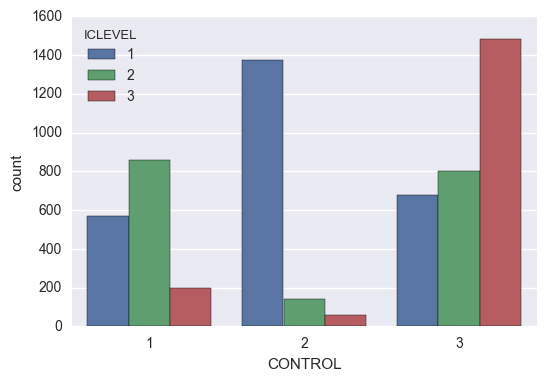

In [20]:
sns.countplot(x="CONTROL", hue="ICLEVEL", data=college);

According to the plot, most of the public school (`CONTROL`=1) provide 2-year level of education (`ICLEVEL`=2). Most of the private non-profit school (`CONTROL`=2) provide 4-year level of education(`ICLEVEL`=1). For the private for-profit, most offer less-than-2-year level of education(`ICLEVEL`=3).

The boxplot, as shown below, displays the distribution of variable `PCTFLOAN` and variable `PCTPELL` in each type of institution (that is, group by `CONTROL`).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1141a5390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115b5ae48>], dtype=object)

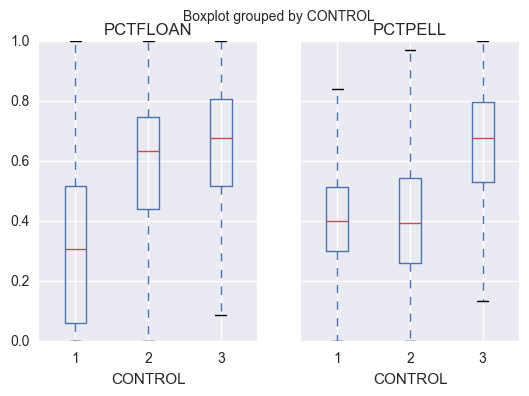

In [21]:
college.boxplot(column=["PCTFLOAN","PCTPELL"], by="CONTROL")

* From the first boxplot, we know that the rate of receiving federal loan is the lowest in the public institutions (`CONTROL`=1), and the rate of receiving federal loan is the highest in the private for-profit institutions (`CONTROL`=3).
* Unlike the first boxplot, the second boxplot shows that the private non-profit instutitions, instead of public institutions, has the lowest rate of receiving pell grand. The private for-profit institutions has the highest rate of receiving pell grand. 

The two boxplots, as shown below, demonstrate the distribution of variable `DEP_INC_AVG` and variable `IND_INC_AVG` in each type of institution (that is, group by CONTROL).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117bcfb00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117ce50b8>], dtype=object)

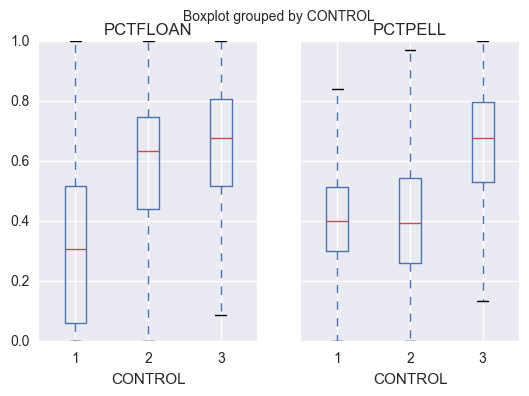

In [22]:
college.boxplot(column=["PCTFLOAN","PCTPELL"], by="CONTROL")

From the both boxplots, we know that the average family income for both dependent students and independent students are the highest in the private non-profit institutions (`CONTROL`=2), and the average family income for both dependent students and independent students are the lowest in the private for-profit institutions (`CONTROL`=3).

As a whole, the average family income for independent students are lower than the average family income for dependent students in each type of institution. 


The four plots, as shown below, display the histogram of the percentage of female, married students, dependent students and veterans, respectively, group by level and type of institutions. 

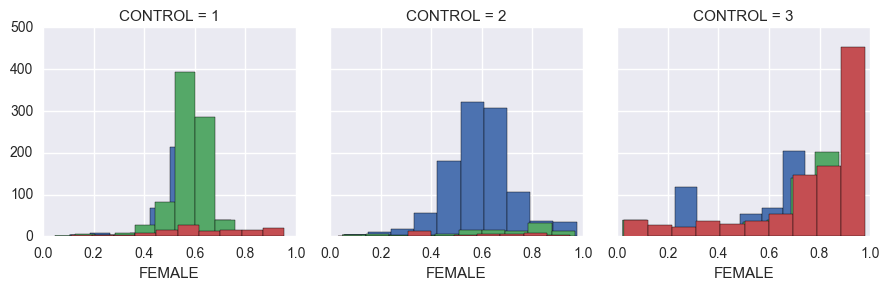

In [23]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "FEMALE");

From the histogram above, most of public schools and private non-profit schools have around 60% of female students while the range of percentage of females student in private for-profit schools is between 70% and 100%. 

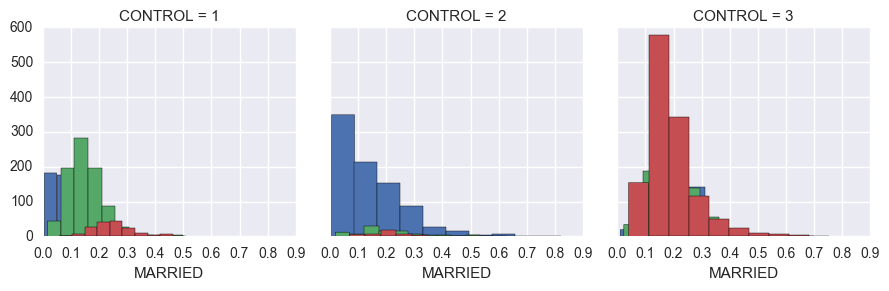

In [24]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "MARRIED");

From the histogram above, for public institutions (`CONTROL`=1), those that provide 2-year education and 4-year education have around 10% of married students while whose that provide less-than-2-year education have around 25% of married students. Most private non-profit schools provide 4-year education (`ICLEVEL`=1) and most of institutions in this type have less than 10% of married students. While, most private for-profit schools provide less-than-2-year education (`ICLEVEL`=3) and most institutions in this type have around 15% of married students. 

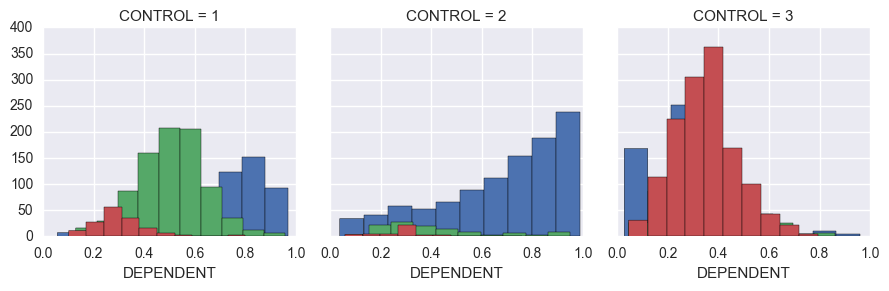

In [25]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "DEPENDENT");

From the histogram above, the private for-profit schools has the highest frequency of dependent students. For public institutions (`CONTROL`=1), most provide 2-year education. For this type of institutions, those with 2-year education have around 50% of dependent students, those with 4-year education have around 10% of dependent students and those with less-than-2-year education have around 80% of dependent students. Most private non-profit schools provide 4-year education while most private for-profit schools provide less-than-2-year education.

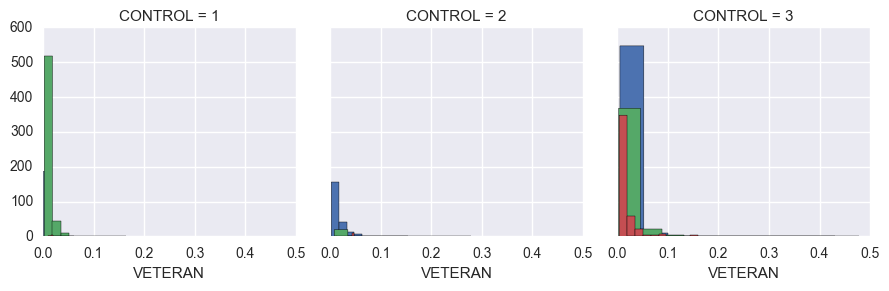

In [26]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "VETERAN");

From the histogram above, the public and private non-profit schools have less than 0.5% of veterans while the average percentage of veterans in private for-profit schools have veterans is 0.5%. The public institutions that have veterans usually provide 2-year education and most private institutions that have veterans usually provide 4-year education. 

### *2.2 Examine the correlation*

We use the `corr()` method to compute pairwise correlation of columns, excluding NA/null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118e75e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126a25240>]], dtype=object)

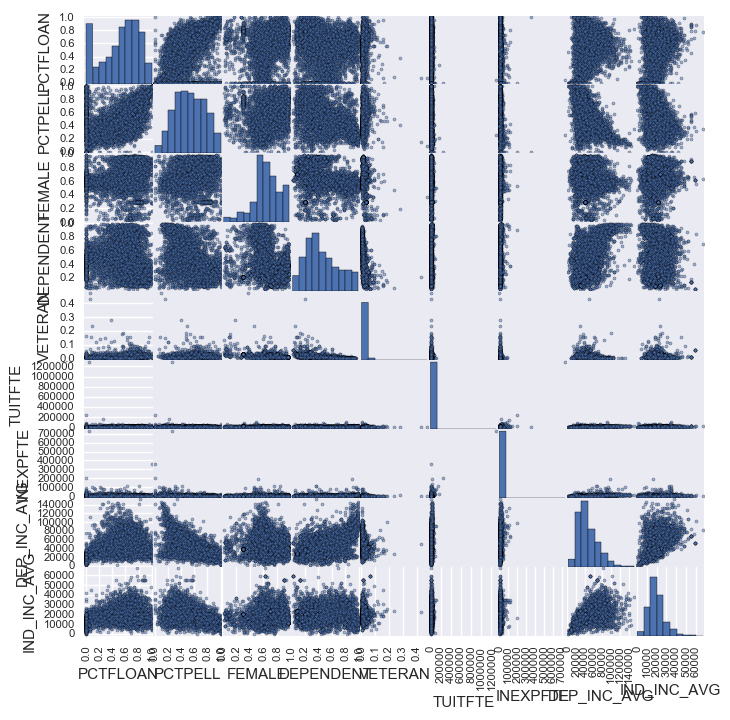

In [27]:
corr_matrix = college.corr()
from pandas.tools.plotting import scatter_matrix
attributes = ["PCTFLOAN","PCTPELL","FEMALE","DEPENDENT","VETERAN","TUITFTE","INEXPFTE","DEP_INC_AVG","IND_INC_AVG"]
scatter_matrix(college[attributes], figsize=(8, 8))

From the scatterplot matrix, as shown above, we obviously can capture two relationships between variables.
* `PCTFLOAN` and `PCTPELL` are positively correlated
* `DEP_INC_AVG` and `IND_INC_AVG` are positively correlated

Let's have a closer look at the relationships between `PCTFLOAN` (the rate of receiving federal loan) and `PCTPELL`(the rate of receiving pell grand). Different colors represent different types of institutions (`CONTROL`)

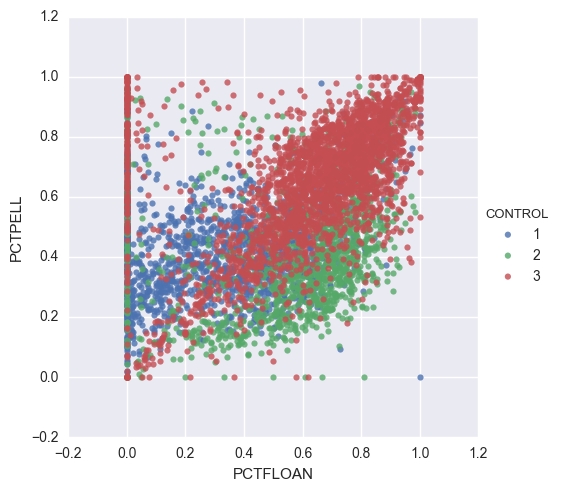

In [28]:
sns.lmplot("PCTFLOAN", "PCTPELL", data=college, fit_reg=False,hue="CONTROL")

The plot shows that, in general, there is a positive relationships between `PCTFLOAN` and `PCTPELL` for each type of institution, which indicates that the higher the rate of receiving federal loan, the higher the rate of receiving pell grand as well in the same institution; verse vice. However, some institutions does not offer federal loan no matter how high the rate of receiving pell grand in these institutions.  

## 3. Prepare the data for Machine Learning algorithms

We now create a new copy of the `train_set` and separate two target variables from independent variables. The DataFrame `college` contains the predictors,  and the DataFrame `college_type` has `CONTROL` and `ICLEVEL`. We confirm their dimensions.

In [38]:
college = train_set.drop(["CONTROL","ICLEVEL"], axis=1)
college_target = train_set[[ "CONTROL"]].copy()
print(college.shape)
print(college_target.shape)

(6162, 10)
(6162, 1)


### *3.2 Data cleaning - imputing missing values*

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. We compute the median value on the training set and use it to fill the missing values in the training set.

In [39]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Use **fit()** method to add `imputer` instance to the dataframe `college` which contains our independent variables. <br>
The `Imputer` class helps to impute missing values, either using mean, median or the most frequent value of the row or column where missing values are located.

In [40]:
imputer.fit(college)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Now, replace missing values by the computed medians in order to transform the training set:

In [41]:
X = imputer.transform(college)
type(X)

numpy.ndarray

Because the result is a Numpy array with transformed features. We can change the result to a Pandas DataFrame.

In [42]:
college = pd.DataFrame(X, columns=college.columns)

In [43]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 10 columns):
PCTFLOAN       6162 non-null float64
PCTPELL        6162 non-null float64
FEMALE         6162 non-null float64
MARRIED        6162 non-null float64
DEPENDENT      6162 non-null float64
VETERAN        6162 non-null float64
TUITFTE        6162 non-null float64
INEXPFTE       6162 non-null float64
DEP_INC_AVG    6162 non-null float64
IND_INC_AVG    6162 non-null float64
dtypes: float64(10)
memory usage: 481.5 KB


## Decision Tree

Load the libraries.

In [44]:
import numpy             as np
import pandas            as pd

%matplotlib inline
import matplotlib        as mpl
import matplotlib.pyplot as plt
import pydotplus         as pdp
import seaborn           as sea

import sklearn.metrics         as sk_me
import sklearn.model_selection as sk_ms
import sklearn.linear_model    as sk_lm
import sklearn.preprocessing   as sk_pp
import sklearn.multiclass      as sk_mc
import sklearn.datasets        as sk_ds
import sklearn.tree            as sk_dt
import sklearn.pipeline        as sk_pl
import sklearn.svm             as sk_sv
import sklearn.neighbors       as sk_nb

import scipy.stats             as sp_st
import IPython.display         as ip_d
import pickle                  as pickle

In [45]:
(college_train_data,   college_test_data,
 college_target_train, college_target_test
 ) = sk_ms.train_test_split(college, 
                            college_target, 
                            test_size=0.2, 
                            random_state=42)
(college_train_data.shape, college_target_train.shape, 
 college_test_data.shape,  college_target_test.shape
)

((4929, 10), (4929, 1), (1233, 10), (1233, 1))

Create a decision tree classifier.

In [46]:
dt_clf  = sk_dt.DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Fit the classifier to the training data

In [47]:
dt_clf.fit(college_train_data, 
           college_target_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Create feature names for graph.

In [55]:
college.feature_names = ['PCTFLOAN','PCTPELL','FEMALE','MARRIED', 'DEPENDENT', 'VETERAN',
                          'TUITFTE', 'INEXPFTE', 'DEP_INC_AVG', 'IND_INC_AVG' ]

In [65]:
college_target.feature_names = np.array(['1','2','3'])

Create an image of the fit classifier.

2017-03-22 23:58:30.140 dot[2814:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-22 23:58:30.143 dot[2814:507] CoreText performance note: Set a breakpoint on CTFontLogSuboptimalRequest to debug.
2017-03-22 23:58:30.290 dot[2814:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-22 23:58:30.290 dot[2814:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-22 23:58:30.291 dot[2814:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostSc

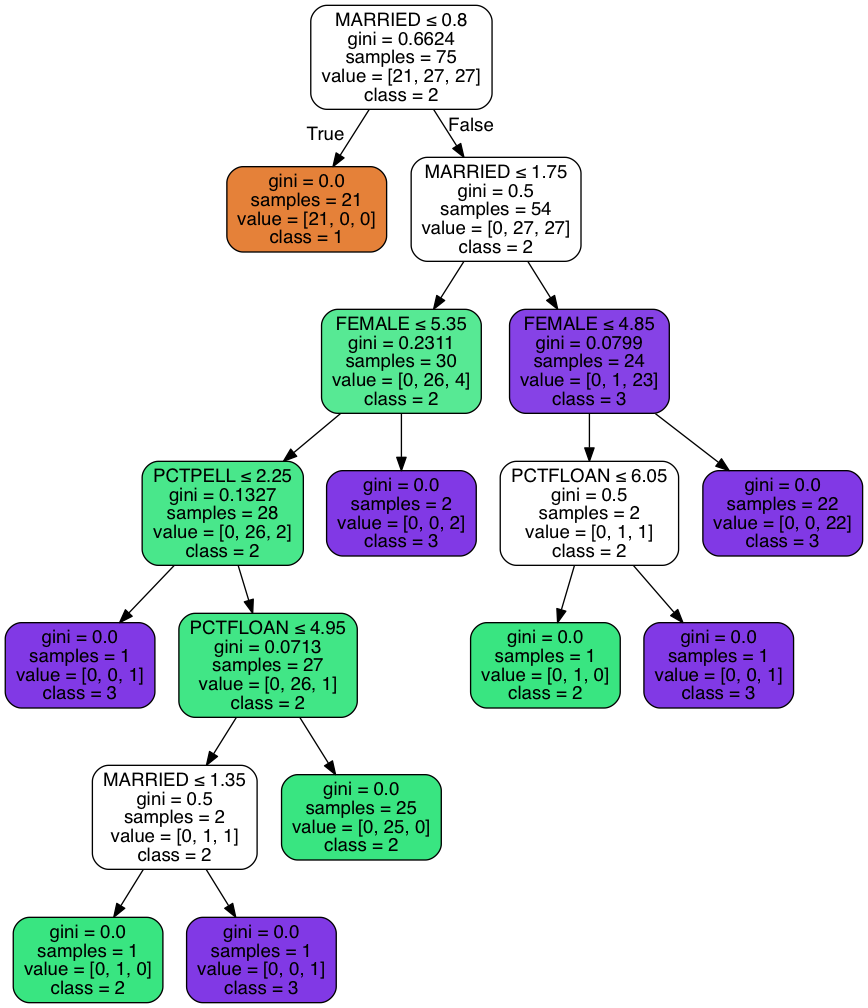

In [66]:
graph = sk_dt.export_graphviz(dt_clf, 
                              out_file=None, 
                              feature_names=college.feature_names,  
                              class_names=college_target.feature_names,  
                              filled=True, 
                              rounded=True,  
                              special_characters=True)
                               
                               
ip_d.Image(pdp.graph_from_dot_data(graph
                                  ).create_png()
          ) 

Prediction. Create predictions for the training and the testing datasets (based on the model fitted to the training dataset.)

In [67]:
college_train_predict = dt_clf.fit(college_train_data,
                                college_target_train
                               ).predict(college_train_data
                                        )
college_test_predict = dt_clf.fit(college_train_data, 
                               college_target_train
                              ).predict(college_test_data
                                       )

A confusion matrix is produced for each. This is a simple example of overfitting the dataset.

In [68]:
pd.DataFrame(sk_me.confusion_matrix(college_target_train, 
                                    college_train_predict
                                   )
            )

,0,1,2
0,1287,1,0
1,0,1254,0
2,0,1,2386


Notice the errors on the test dataset

In [69]:
pd.DataFrame(sk_me.confusion_matrix(college_target_test, 
                                    college_test_predict
                                   )
            )

,0,1,2
0,300,20,18
1,26,244,51
2,17,65,492


Now create a decision tree model with leaf nodes that contain at least 5 rows. This is a simple example of regularization (working).

In [70]:
dt_clf  = sk_dt.DecisionTreeClassifier(min_samples_leaf=100)

Create the predictions.

In [71]:
college_train_predict = dt_clf.fit(college_train_data,
                                college_target_train
                               ).predict(college_train_data
                                        )
college_test_predict = dt_clf.fit(college_train_data, 
                               college_target_train
                              ).predict(college_test_data
                                       )

Produce a confusing matrix for predictions on the training dataset.

In [72]:
pd.DataFrame(sk_me.confusion_matrix(college_target_train, 
                                    college_train_predict
                                   )
            )

,0,1,2
0,1027,132,129
1,68,894,292
2,58,176,2153


Produce a confusing matrix for predictions on the test dataset. Notice the lack of errors.

In [102]:
conf_mx= pd.DataFrame(sk_me.confusion_matrix(college_target_test, 
                                    college_test_predict
                                   )
            )
conf_mx

,0,1,2
0,269,34,35
1,19,226,76
2,10,50,514


## Performance measures

** 1) Measuring accuracy using cross-validation **

In [98]:
college_target_train = pd.DataFrame.as_matrix(college_target_train).ravel()

college_target_train.shape

AttributeError: 'numpy.ndarray' object has no attribute '_consolidate_inplace'

In [97]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= dt_clf,     # Model to test
                X= college_train_data,  
                y = college_target_train,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.77250608  0.79001826  0.80267966]
Average accuracy:  0.788401333653


** 2) Confusion matrix **

This has been explained in the earlier section.

** 3) Precision and Recall **

In [111]:
from sklearn.metrics import precision_score
precision_score(college_target_train, college_train_predict,average= None)

array([ 0.89071986,  0.7437604 ,  0.83644134])

In [112]:
from sklearn.metrics import recall_score
recall_score(college_target_train, college_train_predict,average= None)

array([ 0.79736025,  0.71291866,  0.901969  ])

In [113]:
from sklearn.metrics import f1_score
f1_score(college_target_train, college_train_predict,average= None)

array([ 0.84145842,  0.72801303,  0.86797017])